Arbitrary value imputation is a missing-data handling technique where missing values are replaced with a fixed, manually chosen value that does not come from the data distribution


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isna().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [ ]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_99'] = x_train['Fare'].fillna(99)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [ ]:
x_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [ ]:
print('Original age variable variance: ',x_train['Age'].var())
print('Age variance 99 wala imputation: ',x_train['Age_99'].var())
print('Age variance -1 wala imputation: ',x_train['Age_minus1'].var())

print('Original fare variable variance: ',x_train['Fare'].var())
print('Fare variance 99 wala imputation: ',x_train['Fare_99'].var())
print('Fare variance -1 wala imputation: ',x_train['Fare_minus1'].var())

Original age variable variance:  204.3495133904614
Age variance 99 wala imputation:  951.7275570187172
Age variance -1 wala imputation:  318.0896202624484
Original fare variable variance:  2448.197913706318
Fare variance 99 wala imputation:  2536.0773428319685
Fare variance -1 wala imputation:  2378.5676784883503


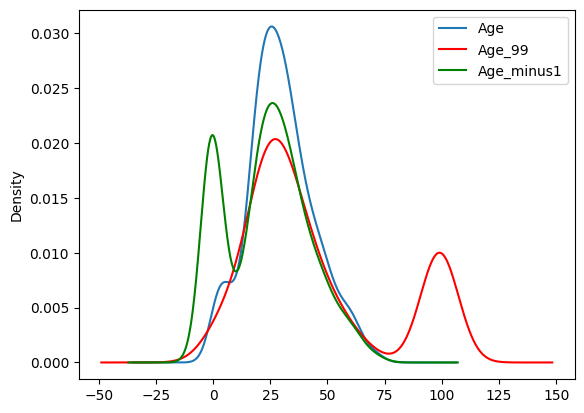

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with 99
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
x_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

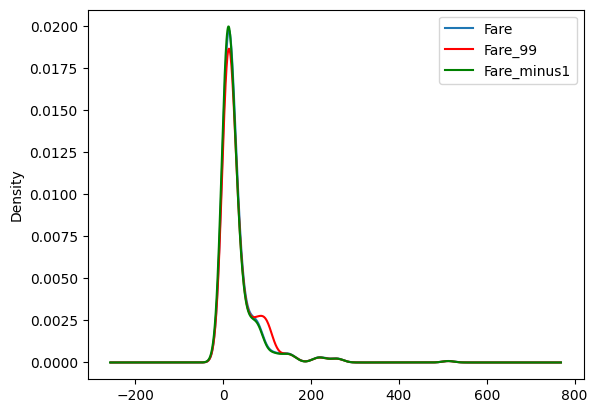

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with 99
x_train['Fare_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
x_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [ ]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [ ]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


**Using Sklearn**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [ ]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value = 999)

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ("imputer2",imputer2,['Fare'])
],remainder = 'passthrough')

In [ ]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])